### Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import gc
import warnings

warnings.filterwarnings('ignore')

### Initialize the dataframe

In [ ]:
df = pd.read_excel('processed_df.xlsx')
df["Time"] = pd.to_datetime(df["Time"]).dt.normalize()
df.head()

,Time,Godavari,Lele,Khumaltar,Sankhu,Panipokhari (Kathmandu),Nagarkot,Bhaktapur,Changu Narayan,Chapa Gaun,Buddhanilakantha,Khokana,Sundarijal (Mulkharka),Naikap,Jitpurphedhi,Nangkhel,Kathmandu Airport
0,1994-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Analysis

In [ ]:
df.dtypes

,0
Time,datetime64[ns]
Godavari,float64
Lele,float64
Khumaltar,float64
Sankhu,float64
Panipokhari (Kathmandu),float64
Nagarkot,float64
Bhaktapur,float64
Changu Narayan,float64
Chapa Gaun,float64


In [ ]:
df.describe()

,Time,Godavari,Lele,Khumaltar,Sankhu,Panipokhari (Kathmandu),Nagarkot,Bhaktapur,Changu Narayan,Chapa Gaun,Buddhanilakantha,Khokana,Sundarijal (Mulkharka),Naikap,Jitpurphedhi,Nangkhel,Kathmandu Airport
count,11202,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000,11202.000000
mean,2009-04-23 03:22:43.256561408,4.330844,4.428187,3.228523,5.033881,4.041265,5.041912,3.757111,4.775009,3.442517,4.279335,3.509831,5.929696,3.173557,3.975687,2.877340,4.211050
min,1994-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001-09-01 06:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2009-05-02 12:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-12-31 18:00:00,2.100000,2.600000,1.600000,2.575000,1.600000,3.500000,2.200000,3.200000,1.300000,1.580000,2.000000,4.200000,0.280000,1.500000,0.800000,2.300000
max,2024-07-01 00:00:00,225.200000,280.000000,136.000000,179.500000,151.000000,161.500000,195.000000,165.500000,200.500000,159.000000,249.200000,153.800000,235.500000,128.200000,191.500000,177.000000
std,NaN,11.377557,11.472827,8.636201,11.598933,10.248389,12.052668,9.578385,11.375296,9.889321,10.805839,9.606942,13.732254,9.513930,10.569100,8.685722,10.835871


In [ ]:
df.tail()

,Time,Godavari,Lele,Khumaltar,Sankhu,Panipokhari (Kathmandu),Nagarkot,Bhaktapur,Changu Narayan,Chapa Gaun,Buddhanilakantha,Khokana,Sundarijal (Mulkharka),Naikap,Jitpurphedhi,Nangkhel,Kathmandu Airport
11197,2024-06-27,4.50,1.70,3.4,0.98,1.05,1.50,3.7,0.01,1.68,0.30,2.20,0.78,0.01,0.77,1.51,0.2
11198,2024-06-28,9.30,0.00,10.6,0.00,0.00,0.00,14.1,15.20,0.00,88.40,0.00,0.00,0.00,0.00,0.00,19.5
11199,2024-06-29,0.00,0.39,6.3,0.39,0.39,0.39,17.0,10.60,0.39,0.39,0.39,0.39,0.39,0.39,0.39,12.6
11200,2024-06-30,0.32,0.32,4.8,0.32,0.32,0.32,6.9,2.50,0.32,0.32,0.32,0.32,0.32,0.32,0.32,18.2
11201,2024-07-01,0.32,0.32,16.6,0.32,0.32,0.32,6.9,2.50,0.32,0.32,0.32,0.32,0.32,0.32,0.32,49.0


### Exploratory Data Analysis

In [ ]:
stations = df[df.columns[1:]].columns
n_stations = len(stations)

In [ ]:
stations, n_stations

(Index(['Godavari', 'Lele', 'Khumaltar', 'Sankhu', 'Panipokhari (Kathmandu)',
        'Nagarkot', 'Bhaktapur', 'Changu Narayan', 'Chapa Gaun',
        'Buddhanilakantha', 'Khokana', 'Sundarijal (Mulkharka)', 'Naikap',
        'Jitpurphedhi', 'Nangkhel', 'Kathmandu Airport'],
       dtype='object'),
 16)

<ipython-input-8-73edd2f59807>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


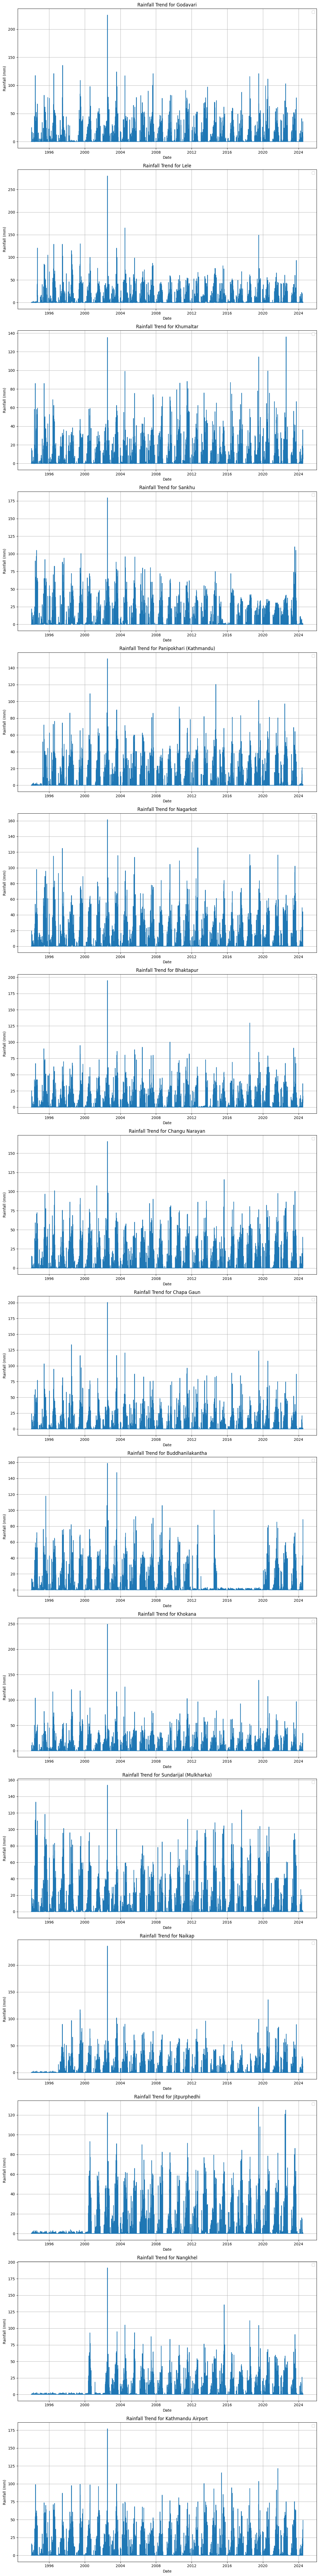

In [ ]:
fig, axes = plt.subplots(n_stations, 1, figsize=(12, 6 * n_stations))

for i, station in enumerate(stations):
    ax = axes[i]
    ax.plot(df.Time, df[station])
    ax.set_title(f"Rainfall Trend for {station}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Rainfall (mm)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

### Moving Average

In [ ]:
moving_avgs = {}

In [ ]:
for station in stations:
  moving_avgs[station] = df[station].rolling(window=7, min_periods=1).mean()

<ipython-input-11-9a83a4539f85>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


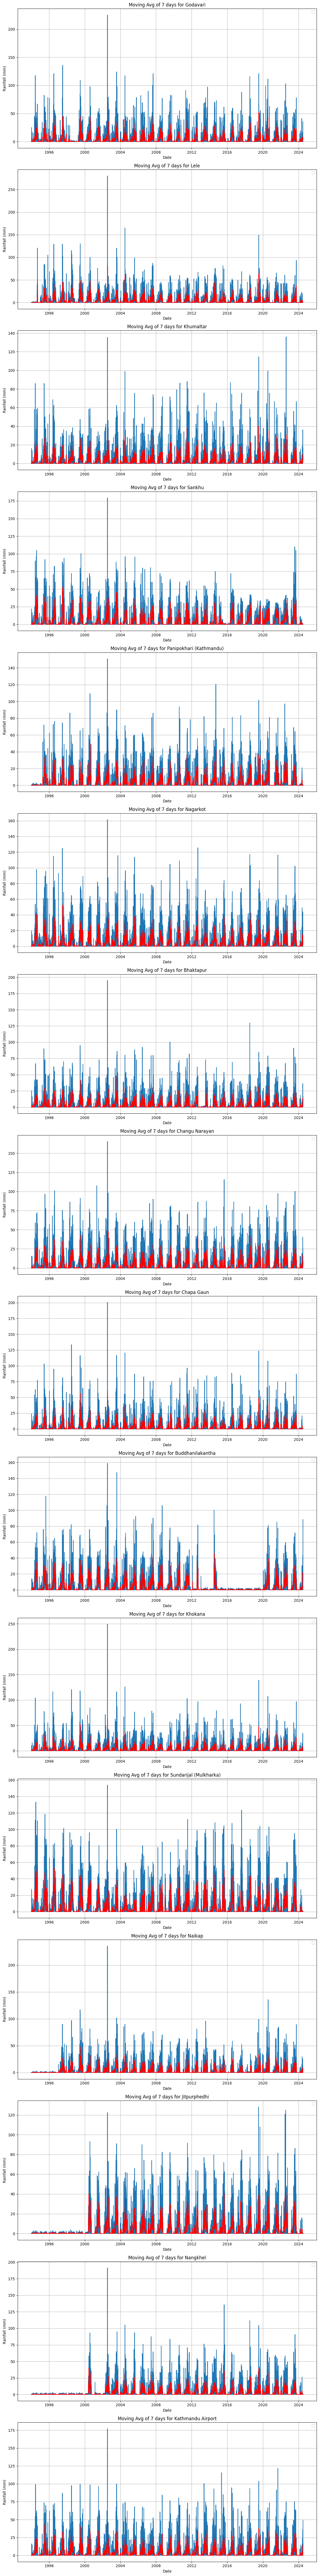

In [ ]:
fig, axes = plt.subplots(n_stations, 1, figsize=(12, 6 * n_stations))

for i, station in enumerate(stations):
    ax = axes[i]
    ax.plot(df.Time, df[station])
    ax.plot(df.Time, moving_avgs[station], 'r')
    ax.set_title(f"Moving Avg of 7 days for {station}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Rainfall (mm)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

### Model Training

In [ ]:
time_steps = 30
future_days = 10
results = {}

In [ ]:
def preprocess_data(df, station, time_steps=30):
    data = df[["Time", station]].dropna()
    data.set_index("Time", inplace=True)

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)

    # Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - time_steps):
        X.append(scaled_data[i:i+time_steps])
        y.append(scaled_data[i+time_steps])

    X, y = np.array(X), np.array(y)
    return X, y, scaler

In [ ]:
def build_lstm_model(input_shape):
    model = Sequential([
        Bidirectional(LSTM(100, return_sequences=True, input_shape=input_shape)),  # Bidirectional LSTM
        Dropout(0.3),  # Increased dropout rate
        BatchNormalization(),  # Batch normalization for better convergence
        LSTM(100, return_sequences=True),  # Second LSTM layer
        Dropout(0.3),
        BatchNormalization(),
        LSTM(50, return_sequences=False),  # Third LSTM layer
        Dropout(0.2),
        Dense(50, activation='relu'),  # Additional dense layer
        BatchNormalization(),
        Dense(25, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[tf.keras.metrics.MeanAbsoluteError()])
    return model

In [ ]:
def get_callbacks(station):
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),  # Stop training if no improvement
        ModelCheckpoint(f"{station}_best_lstm_model.h5", monitor='val_loss', save_best_only=True),  # Save the best model
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)  # Reduce learning rate on plateau
    ]
    return callbacks

In [ ]:
for station in df.columns[1:]:  # Skip Time column
    if station != 'Nangkhel':
      continue

    print(f"Training model for {station}...")
    X, y, scaler = preprocess_data(df, station, time_steps)
    split = int(len(X) * 0.8)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

    model = build_lstm_model((time_steps, 1))
    callbacks = get_callbacks(station)

    # Train the model with callbacks
    history = model.fit(
        X_train, y_train,
        epochs=50,  # Increased epochs
        batch_size=32,  # Adjusted batch size
        validation_data=(X_test, y_test),
        callbacks=callbacks,
        verbose=False
    )

    # Load the best saved model
    # No need to specify custom objects since we're using standard loss functions
    model = tf.keras.models.load_model(f"{station}_best_lstm_model.h5")

    # Evaluate model
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    results[station] = {"RMSE": rmse, "MAE": mae, "R2": r2, "model": model, "scaler": scaler}

    print(f"{station} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.4f}")

    # Delete variables to free up memory
    del X, y, X_train, X_test, y_train, y_test, model, y_pred, y_pred_inv, y_test_inv, history
    gc.collect()  # Force garbage collection

Training model for Nangkhel...


70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Nangkhel - RMSE: 8.79, MAE: 4.47, R²: 0.1330


In [ ]:
results

{'Godavari': {'RMSE': 9.836950337191558,
  'MAE': 4.6046470289147345,
  'R2': 0.16742628245571323,
  'model': <Sequential name=sequential_9, built=True>,
  'scaler': MinMaxScaler()},
 'Lele': {'RMSE': 9.048712443985709,
  'MAE': 4.576381202485471,
  'R2': 0.20109672548628088,
  'model': <Sequential name=sequential_10, built=True>,
  'scaler': MinMaxScaler()},
 'Khumaltar': {'RMSE': 8.663872312055092,
  'MAE': 4.142147380225077,
  'R2': 0.12142970656561924,
  'model': <Sequential name=sequential_11, built=True>,
  'scaler': MinMaxScaler()},
 'Sankhu': {'RMSE': 9.011516251450681,
  'MAE': 5.21191886038314,
  'R2': 0.2670031848077682,
  'model': <Sequential name=sequential_12, built=True>,
  'scaler': MinMaxScaler()},
 'Panipokhari (Kathmandu)': {'RMSE': 9.571270797348689,
  'MAE': 4.743283659036644,
  'R2': 0.2118895155848285,
  'model': <Sequential name=sequential_13, built=True>,
  'scaler': MinMaxScaler()},
 'Nagarkot': {'RMSE': 10.304171888289048,
  'MAE': 5.270981594540129,
  'R2': 

In [ ]:
import pickle

# Save results
with open("results.pkl", "wb") as f:
    pickle.dump(results, f)

In [ ]:
### Testing

In [ ]:
for station in stations:
    X, y, scaler = preprocess_data(df, station, time_steps)
    split = int(len(X) * 0.8)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

    print(f"Predicting future rainfall for {station}...")

    # Retrieve trained model and scaler
    model = results[station]["model"]
    scaler = results[station]["scaler"]

    # Get the last sequence from test data
    last_sequence = X_test[-1].copy()  # Copy to avoid modifying original test data
    predictions = []

    for _ in range(future_days):
        next_pred = model.predict(np.expand_dims(last_sequence, axis=0), verbose=0)
        predictions.append(next_pred[0][0])

        # Shift sequence and add new prediction
        last_sequence = np.roll(last_sequence, -1, axis=0)
        last_sequence[-1] = next_pred  # Update last step with new prediction

    # Inverse transform predictions to original scale
    future_predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    print(f"Future Predictions for {station}: {future_predictions.flatten()}")


Predicting future rainfall for Godavari...
Future Predictions for Godavari: [5.6425633 5.7638063 5.8414783 5.8657002 5.9727182 5.954188  5.967104
 6.1000285 6.209788  6.303447 ]
Predicting future rainfall for Lele...
Future Predictions for Lele: [1.0690126 1.1050198 1.1460171 1.1903272 1.2349377 1.289954  1.3503859
 1.4120612 1.4749548 1.5390584]
Predicting future rainfall for Khumaltar...
Future Predictions for Khumaltar: [5.981406  6.022748  6.0088577 6.0499744 6.0832376 6.0993547 6.1059875
 6.1326227 6.146161  6.166068 ]
Predicting future rainfall for Sankhu...
Future Predictions for Sankhu: [-0.10662172 -0.11449888 -0.12379902 -0.13293065 -0.14270689 -0.15395692
 -0.1652016  -0.17503135 -0.18470594 -0.19542906]
Predicting future rainfall for Panipokhari (Kathmandu)...
Future Predictions for Panipokhari (Kathmandu): [0.10209928 0.09512854 0.08438218 0.07538188 0.06610257 0.05415467
 0.04217527 0.03329197 0.02468769 0.01348681]
Predicting future rainfall for Nagarkot...
Future Predic

In [ ]:
def predict_future_rainfall(future_date, time_steps=30):
    predictions = {}
    with open("results.pkl", "rb") as f:
        results = pickle.load(f)

    for station in df.columns[1:]:
        print(f"Predicting rainfall for {station} on {future_date}...")

        # Load the model without recompiling
        model = load_model(f"{station}_best_lstm_model.h5", compile=False)
        scaler = results[station]["scaler"]

        # Get last available sequence
        last_sequence = df[[station]].dropna().values[-time_steps:]
        last_sequence = scaler.transform(last_sequence)

        next_pred = model.predict(np.expand_dims(last_sequence, axis=0))
        predicted_rainfall = scaler.inverse_transform(next_pred)[0][0]
        predictions[station] = predicted_rainfall

    return predictions


In [ ]:
future_date = "2024-07-02"
predictions = predict_future_rainfall(future_date)

for station, rainfall in predictions.items():
    print(f"{station}: {rainfall:.2f} mm")

Predicting rainfall for Godavari on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
Predicting rainfall for Lele on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
Predicting rainfall for Khumaltar on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Predicting rainfall for Sankhu on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Predicting rainfall for Panipokhari (Kathmandu) on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
Predicting rainfall for Nagarkot on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
Predicting rainfall for Bhaktapur on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
Predicting rainfall for Changu Narayan on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Predicting rainfall for Chapa Gaun on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
Predicting rainfall for Buddhanilakantha on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
Predicting rainfall for Khokana on 2024-07-02...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/

In [ ]:
df.tail()

,Time,Godavari,Lele,Khumaltar,Sankhu,Panipokhari (Kathmandu),Nagarkot,Bhaktapur,Changu Narayan,Chapa Gaun,Buddhanilakantha,Khokana,Sundarijal (Mulkharka),Naikap,Jitpurphedhi,Nangkhel,Kathmandu Airport
11197,2024-06-27,4.50,1.70,3.4,0.98,1.05,1.50,3.7,0.01,1.68,0.30,2.20,0.78,0.01,0.77,1.51,0.2
11198,2024-06-28,9.30,0.00,10.6,0.00,0.00,0.00,14.1,15.20,0.00,88.40,0.00,0.00,0.00,0.00,0.00,19.5
11199,2024-06-29,0.00,0.39,6.3,0.39,0.39,0.39,17.0,10.60,0.39,0.39,0.39,0.39,0.39,0.39,0.39,12.6
11200,2024-06-30,0.32,0.32,4.8,0.32,0.32,0.32,6.9,2.50,0.32,0.32,0.32,0.32,0.32,0.32,0.32,18.2
11201,2024-07-01,0.32,0.32,16.6,0.32,0.32,0.32,6.9,2.50,0.32,0.32,0.32,0.32,0.32,0.32,0.32,49.0


In [ ]:
##

In [ ]:
def predict_future_rainfall(time_steps=30, future_days=30):
    predictions = {}
    with open("results.pkl", "rb") as f:
        results = pickle.load(f)

    future_dates = pd.date_range(start=df["Time"].max() + pd.Timedelta(days=1), periods=future_days)

    for station in df.columns[1:]:
        print(f"Predicting rainfall for {station} for {future_days} days...")
        model = load_model(f"{station}_best_lstm_model.h5", compile=False)
        scaler = results[station]["scaler"]

        last_sequence = df[[station]].dropna().values[-time_steps:]
        last_sequence = scaler.transform(last_sequence)

        station_predictions = []
        for _ in range(future_days):
            next_pred = model.predict(np.expand_dims(last_sequence, axis=0), verbose=False)
            predicted_rainfall = scaler.inverse_transform(next_pred)[0][0]
            station_predictions.append(predicted_rainfall)
            last_sequence = np.append(last_sequence[1:], next_pred, axis=0)

        predictions[station] = station_predictions

    return future_dates, predictions

Predicting rainfall for Godavari for 30 days...
Predicting rainfall for Lele for 30 days...
Predicting rainfall for Khumaltar for 30 days...
Predicting rainfall for Sankhu for 30 days...
Predicting rainfall for Panipokhari (Kathmandu) for 30 days...
Predicting rainfall for Nagarkot for 30 days...
Predicting rainfall for Bhaktapur for 30 days...
Predicting rainfall for Changu Narayan for 30 days...
Predicting rainfall for Chapa Gaun for 30 days...
Predicting rainfall for Buddhanilakantha for 30 days...
Predicting rainfall for Khokana for 30 days...
Predicting rainfall for Sundarijal (Mulkharka) for 30 days...
Predicting rainfall for Naikap for 30 days...
Predicting rainfall for Jitpurphedhi for 30 days...
Predicting rainfall for Nangkhel for 30 days...
Predicting rainfall for Kathmandu Airport for 30 days...


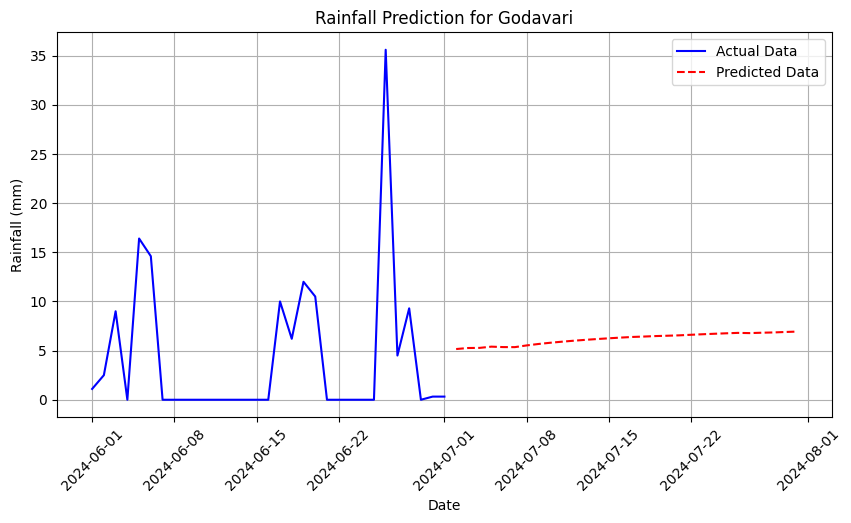

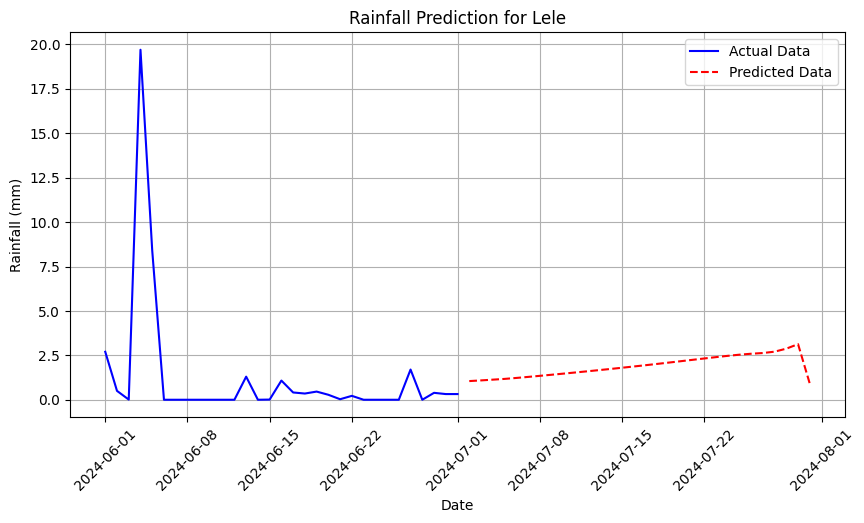

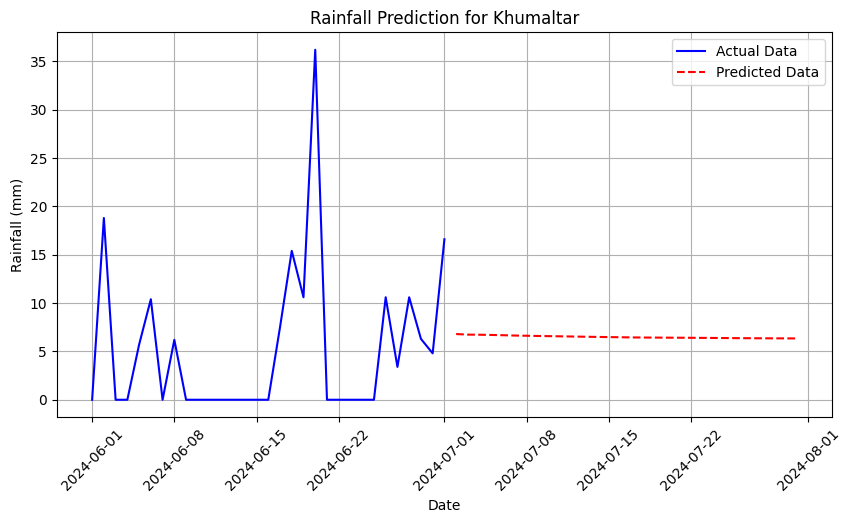

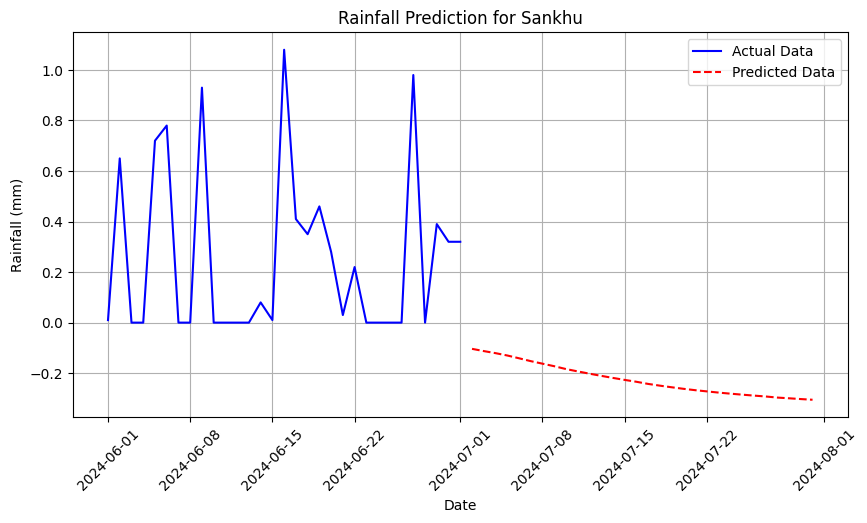

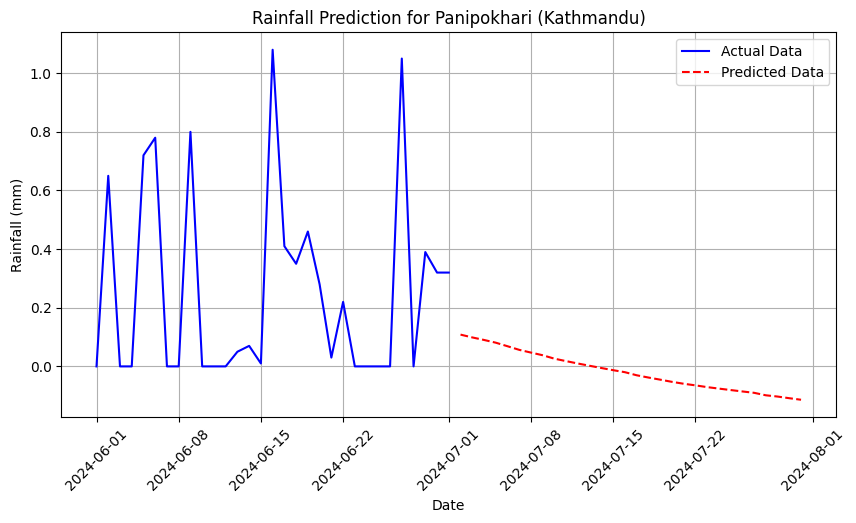

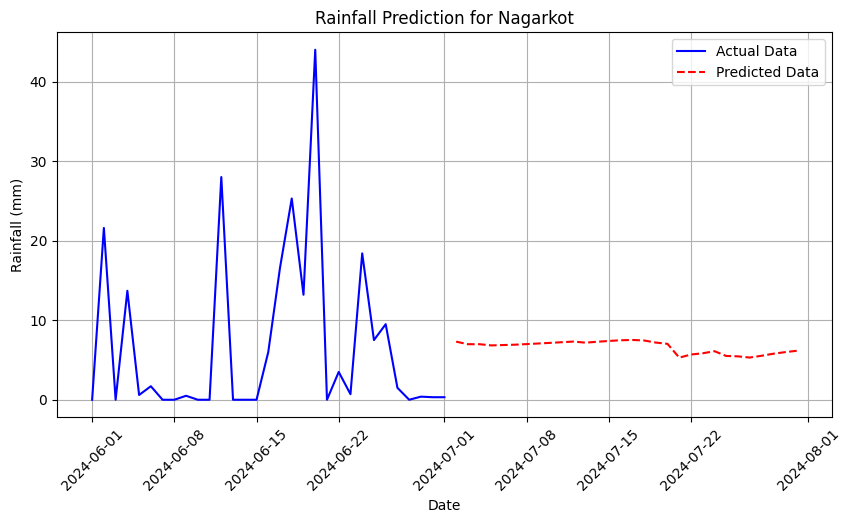

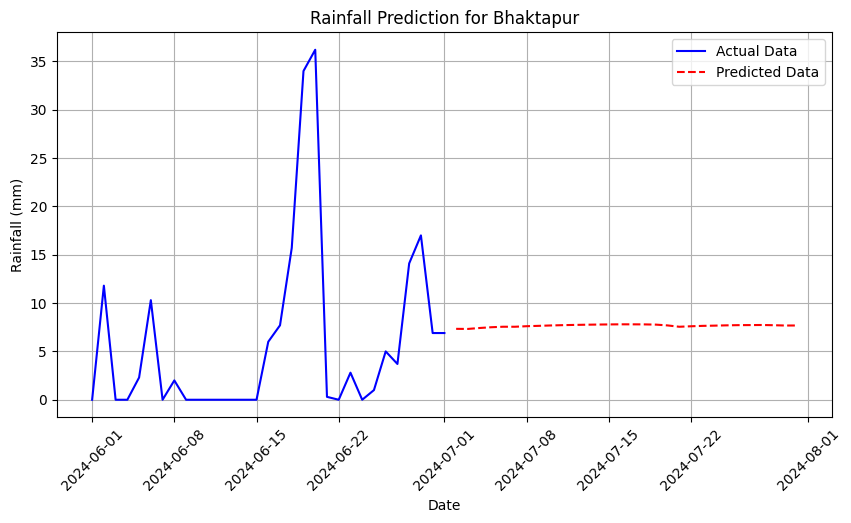

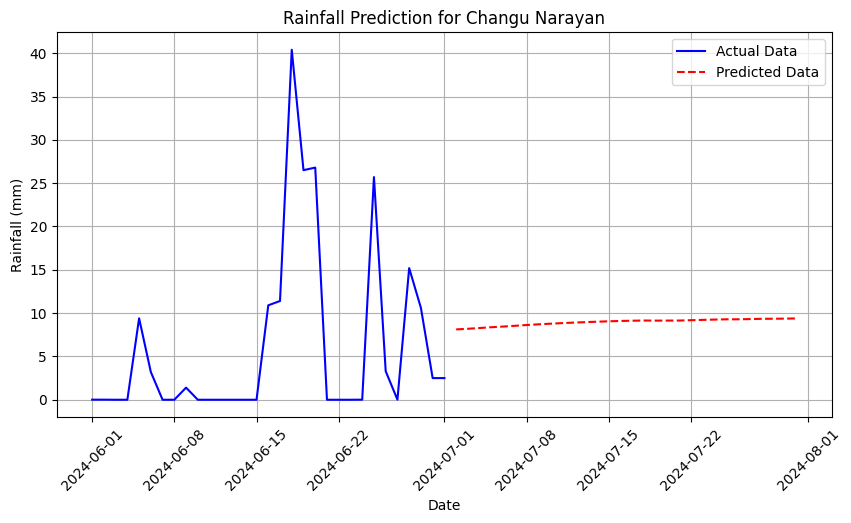

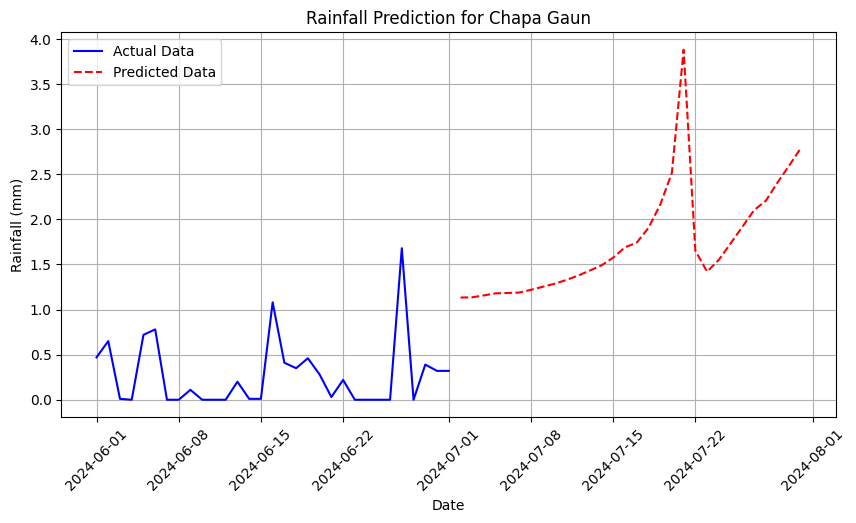

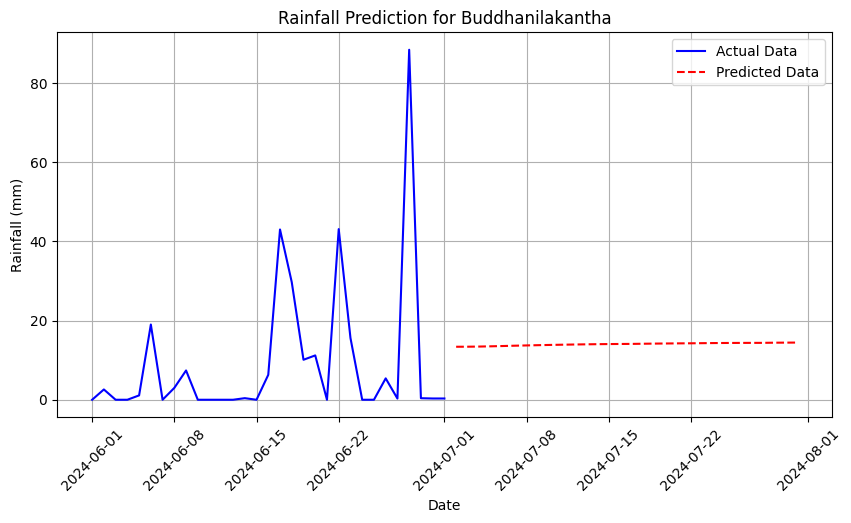

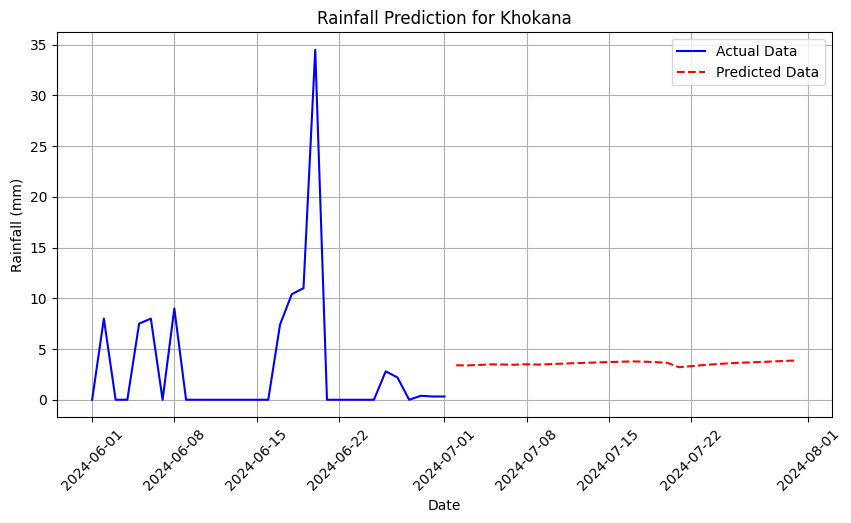

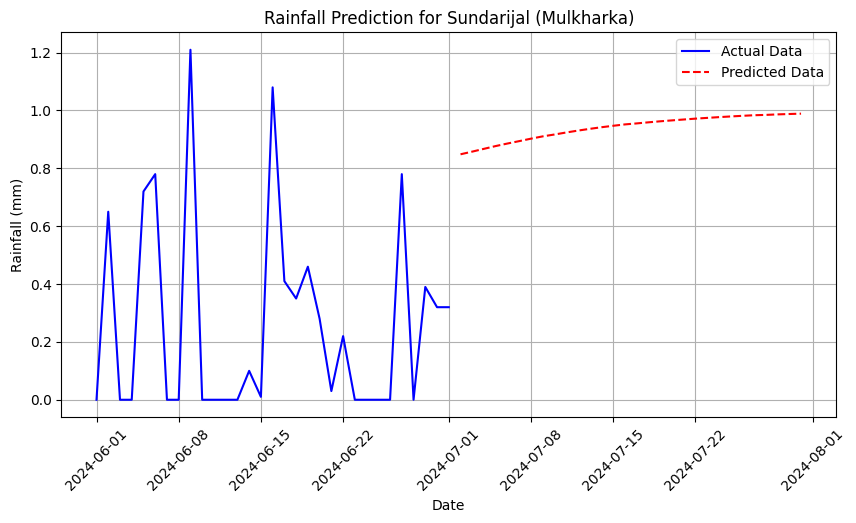

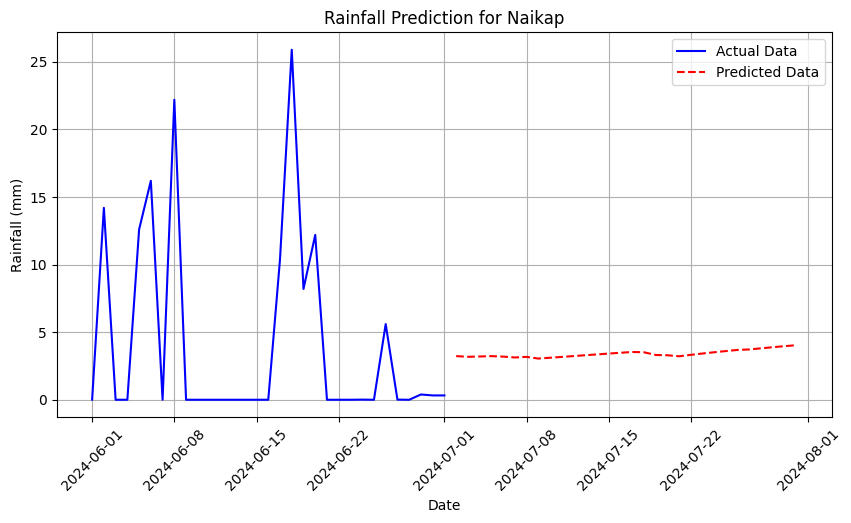

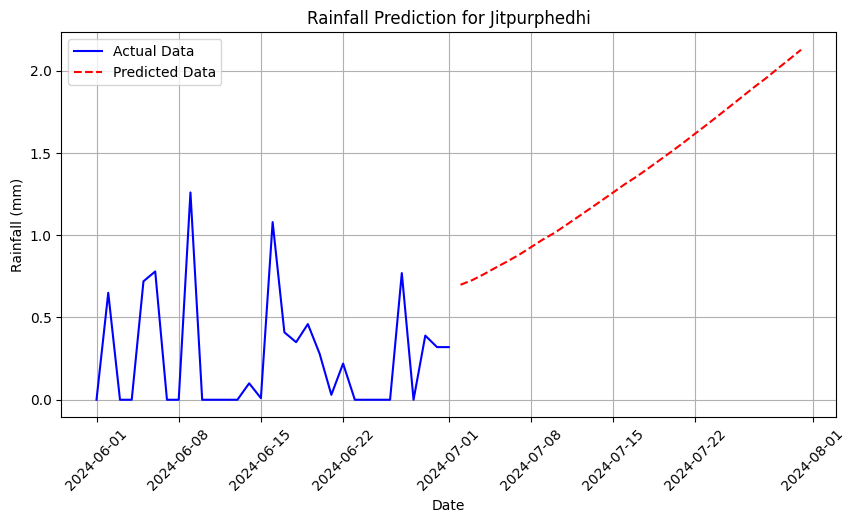

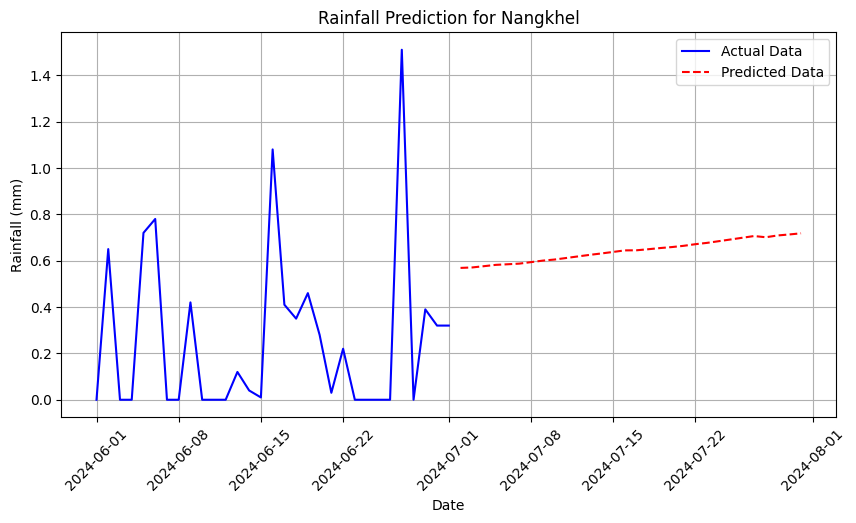

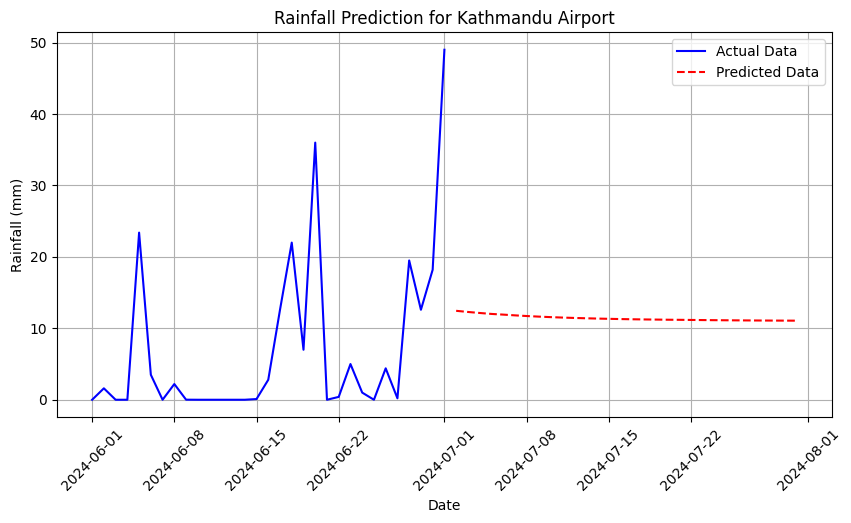

Training and prediction complete. Graphs displayed.


In [ ]:
# Generate future predictions
future_dates, future_predictions = predict_future_rainfall()

# Plot results
for station in df.columns[1:]:
    plt.figure(figsize=(10, 5))
    past_dates = df["Time"].loc[df["Time"] >= "2024-06-01"]
    past_rainfall = df[station].loc[df["Time"] >= "2024-06-01"]

    plt.plot(past_dates, past_rainfall, label="Actual Data", color='blue')
    plt.plot(future_dates, future_predictions[station], label="Predicted Data", color='red', linestyle='dashed')

    plt.xlabel("Date")
    plt.ylabel("Rainfall (mm)")
    plt.title(f"Rainfall Prediction for {station}")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

print("Training and prediction complete. Graphs displayed.")

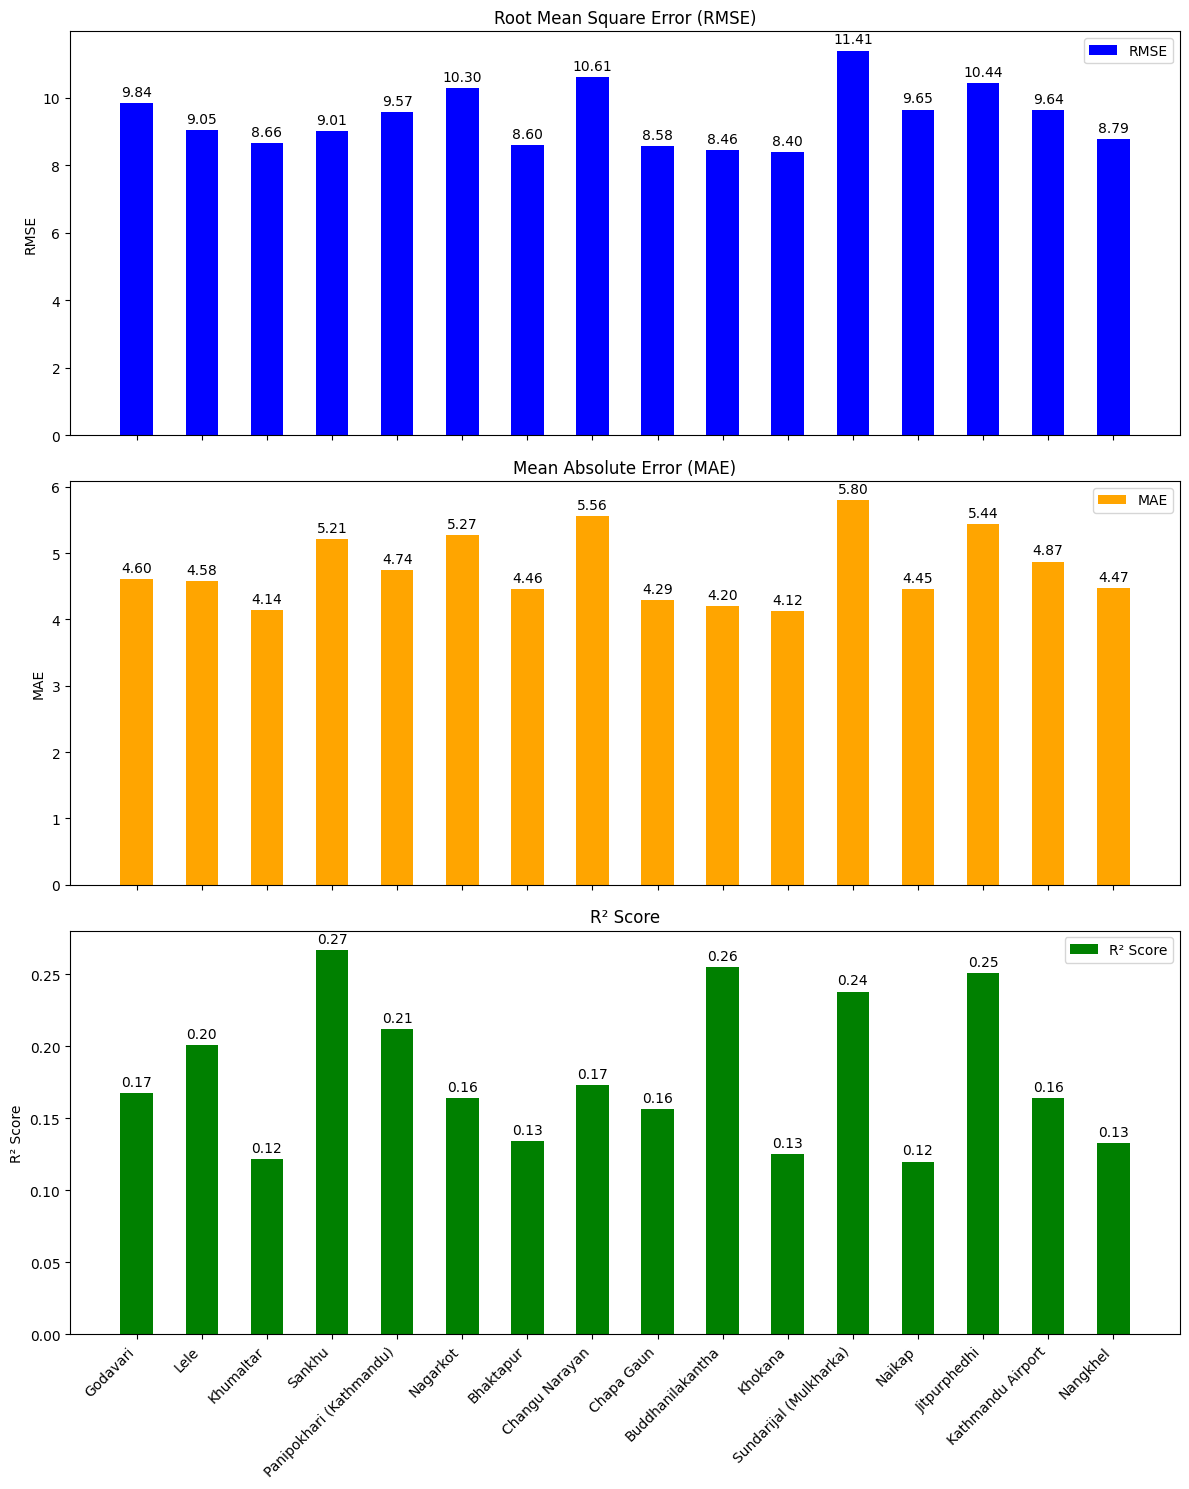

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load results
with open('results.pkl', 'rb') as f:
    results = pickle.load(f)

stations = list(results.keys())

# Extract RMSE, MAE, and R² values
rmse_values = [results[station]["RMSE"] for station in stations]
mae_values = [results[station]["MAE"] for station in stations]
r2_values = [results[station]["R2"] for station in stations]

x_pos = np.arange(len(stations))
width = 0.5  # Adjust width for single bars per plot

fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Function to add labels on bars
def add_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# RMSE subplot
bars_rmse = axes[0].bar(x_pos, rmse_values, width, color='blue', label='RMSE')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Root Mean Square Error (RMSE)')
axes[0].legend()
add_labels(axes[0], bars_rmse)

# MAE subplot
bars_mae = axes[1].bar(x_pos, mae_values, width, color='orange', label='MAE')
axes[1].set_ylabel('MAE')
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].legend()
add_labels(axes[1], bars_mae)

# R² Score subplot
bars_r2 = axes[2].bar(x_pos, r2_values, width, color='green', label='R² Score')
axes[2].set_ylabel('R² Score')
axes[2].set_title('R² Score')
axes[2].legend()
add_labels(axes[2], bars_r2)

# Common x-axis settings
axes[2].set_xticks(x_pos)
axes[2].set_xticklabels(stations, rotation=45, ha='right')

plt.tight_layout()
plt.show()
